<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/tccjunto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2020 = pd.read_csv(
   '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]
)

# Transforma a variável TP_SEXO em binária
educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q002','Q003', 'Q005'])

# Transforma a variável TP_SEXO em binária
educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=84ca10c3d0bbadcff53399b3e67d99822a95e99fdaff61fe5e6288aa80565b06
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


<ipython-input-2-78b303ad51b1>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv(


In [ ]:
# Carrega o dataframe de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', "Q001", "Q002", "Q004", "Q025"])

# Transforma a variável TP_SEXO em binária
educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()


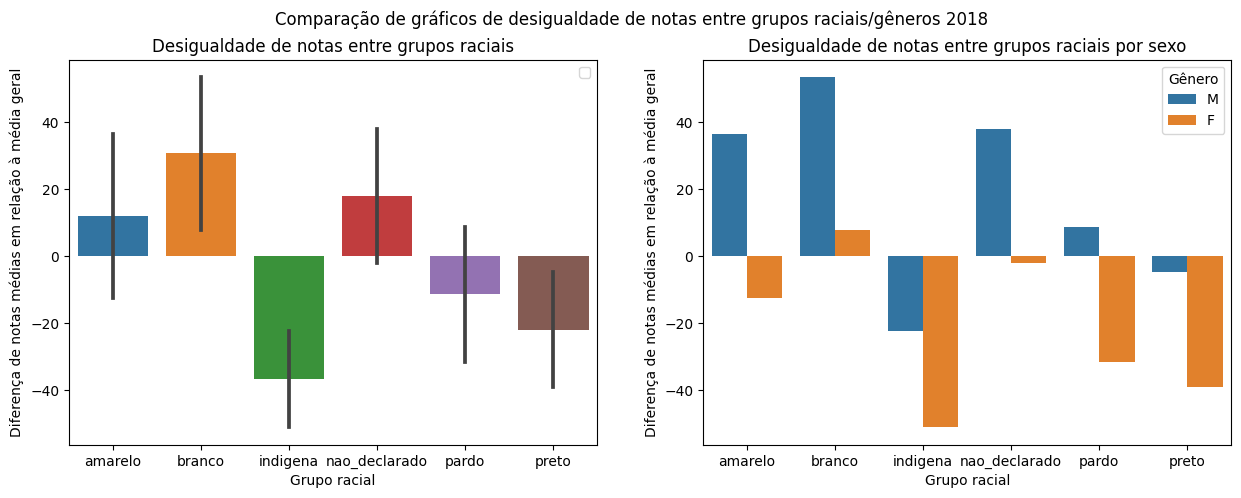

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a nota média geral
mean_score = educacao_2018['NU_NOTA_MT'].mean()

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2018.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean().reset_index()

# Calcular a diferença de notas médias em relação à média geral
score_mean['diff'] = score_mean['NU_NOTA_MT'] - mean_score

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", data=score_mean, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", hue="TP_SEXO_F", data=score_mean, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2018")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação à média geral")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title='Gênero', loc='upper right')

plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')
plt.show()


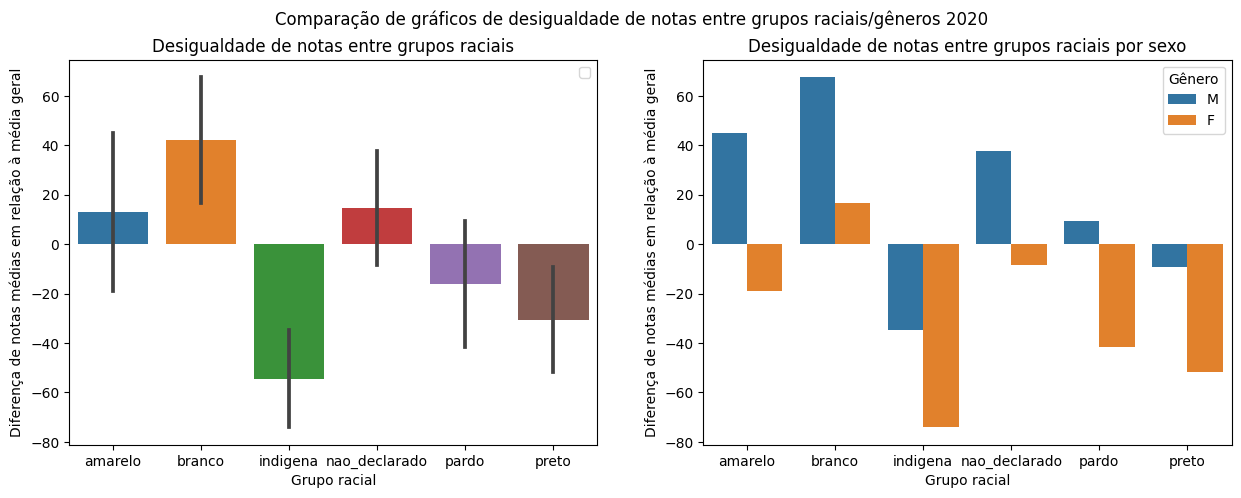

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a nota média geral
mean_score = educacao_2020['NU_NOTA_MT'].mean()

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2020.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean().reset_index()

# Calcular a diferença de notas médias em relação à média geral
score_mean['diff'] = score_mean['NU_NOTA_MT'] - mean_score

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", data=score_mean, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", hue="TP_SEXO_F", data=score_mean, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2020")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação à média geral")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title='Gênero', loc='upper right')

plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')
plt.show()


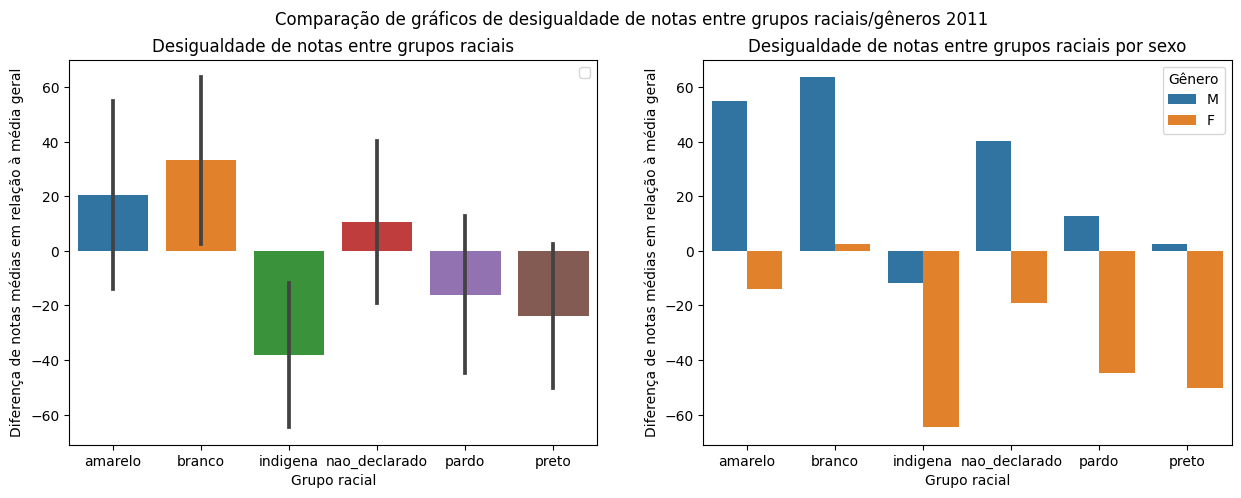

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a nota média geral
mean_score = educacao_2011['NU_NOTA_MT'].mean()

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean().reset_index()

# Calcular a diferença de notas médias em relação à média geral
score_mean['diff'] = score_mean['NU_NOTA_MT'] - mean_score

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", data=score_mean, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", hue="TP_SEXO_F", data=score_mean, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2011")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação à média geral")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title='Gênero', loc='upper right')

plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
educacao_2020.head

<bound method NDFrame.head of         TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT Q001 Q002  \
5             pardo       498.1       604.7       505.4       526.7    C    B   
8             pardo       439.7       383.5       486.2       448.5    B    C   
11           branco       491.1       631.4       627.9       546.5    B    C   
18            pardo       422.4       488.1       559.1       420.3    C    C   
19            preto       486.0       503.3       439.8       405.6    C    D   
...             ...         ...         ...         ...         ...  ...  ...   
5783084       pardo       377.6       404.8       415.8       411.4    B    D   
5783095       preto       478.8       418.1       500.0       332.7    A    B   
5783101       pardo       393.8       401.2       467.4       340.0    D    D   
5783104      branco       508.3       661.4       658.3       725.7    E    G   
5783108       pardo       478.5       625.5       538.4       481.7    F    D  

In [ ]:
# Filtra as linhas que correspondem a homens brancos
homens_brancos = educacao_2018[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2018['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_homens_brancos = homens_brancos.shape[0]

# Imprime o resultado
print("Número de homens brancos:", num_homens_brancos)

Número de homens brancos: 598632


In [ ]:
# Filtra as linhas que correspondem a homens brancos
homens_brancos = educacao_2011[(educacao_2011['TP_SEXO_M'] == 1) & (educacao_2011['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_homens_brancos = homens_brancos.shape[0]

# Imprime o resultado
print("Número de homens brancos:", num_homens_brancos)

Número de homens brancos: 690481


In [ ]:
# Filtra as linhas que correspondem a homens brancos
homens_brancos = educacao_2020[(educacao_2020['TP_SEXO_M'] == 1) & (educacao_2020['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_homens_brancos = homens_brancos.shape[0]

# Imprime o resultado
print("Número de homens brancos:", num_homens_brancos)

Número de homens brancos: 389984


In [ ]:
# Filtra as linhas que correspondem a mulheres brancas
mulheres_brancas = educacao_2018[(educacao_2018['TP_SEXO_F'] == 0) & (educacao_2018['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_mulheres_brancas = mulheres_brancas.shape[0]

# Filtra as linhas que correspondem a homens negros
homens_negros = educacao_2018[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2018['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_homens_negros = homens_negros.shape[0]

# Filtra as linhas que correspondem a mulheres negras
mulheres_negras = educacao_2018[(educacao_2018['TP_SEXO_F'] == 0) & (educacao_2018['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_mulheres_negras = mulheres_negras.shape[0]

# Imprime os resultados
print("Número de mulheres brancas:", num_mulheres_brancas)
print("Número de homens negros:", num_homens_negros)
print("Número de mulheres negras:", num_mulheres_negras)


Número de mulheres brancas: 598632
Número de homens negros: 204949
Número de mulheres negras: 204949


In [ ]:
# Filtra as linhas que correspondem a homens indígenas
homens_indigenas = educacao_2018[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2018['TP_COR_RACA'] == 'indigena')]

# Conta o número de linhas
num_homens_indigenas = homens_indigenas.shape[0]

# Filtra as linhas que correspondem a mulheres indígenas
mulheres_indigenas = educacao_2018[(educacao_2018['TP_SEXO_F'] == 0) & (educacao_2018['TP_COR_RACA'] == 'indigena')]

# Conta o número de linhas
num_mulheres_indigenas = mulheres_indigenas.shape[0]

# Imprime os resultados
print("Número de homens indígenas:", num_homens_indigenas)
print("Número de mulheres indígenas:", num_mulheres_indigenas)


Número de homens indígenas: 9816
Número de mulheres indígenas: 9816


In [ ]:
# Filtra as linhas que correspondem a homens indígenas
homens_indigenas = educacao_2011[(educacao_2011['TP_SEXO_M'] == 1) & (educacao_2011['TP_COR_RACA'] == 'indigena')]

# Conta o número de linhas
num_homens_indigenas = homens_indigenas.shape[0]

# Filtra as linhas que correspondem a mulheres indígenas
mulheres_indigenas = educacao_2011[(educacao_2011['TP_SEXO_F'] == 0) & (educacao_2011['TP_COR_RACA'] == 'indigena')]

# Conta o número de linhas
num_mulheres_indigenas = mulheres_indigenas.shape[0]

# Imprime os resultados
print("Número de homens indígenas:", num_homens_indigenas)
print("Número de mulheres indígenas:", num_mulheres_indigenas)


Número de homens indígenas: 10308
Número de mulheres indígenas: 10308


In [ ]:
# Filtra as linhas que correspondem a mulheres brancas
mulheres_brancas = educacao_2020[(educacao_2020['TP_SEXO_F'] == 0) & (educacao_2020['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_mulheres_brancas = mulheres_brancas.shape[0]

# Filtra as linhas que correspondem a homens negros
homens_negros = educacao_2020[(educacao_2020['TP_SEXO_M'] == 1) & (educacao_2020['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_homens_negros = homens_negros.shape[0]

# Filtra as linhas que correspondem a mulheres negras
mulheres_negras = educacao_2020[(educacao_2020['TP_SEXO_F'] == 0) & (educacao_2020['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_mulheres_negras = mulheres_negras.shape[0]

# Imprime os resultados
print("Número de mulheres brancas:", num_mulheres_brancas)
print("Número de homens negros:", num_homens_negros)
print("Número de mulheres negras:", num_mulheres_negras)


Número de mulheres brancas: 389984
Número de homens negros: 127995
Número de mulheres negras: 127995


In [ ]:
# Filtra as linhas que correspondem a mulheres brancas
mulheres_brancas = educacao_2011[(educacao_2011['TP_SEXO_F'] == 0) & (educacao_2011['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_mulheres_brancas = mulheres_brancas.shape[0]

# Filtra as linhas que correspondem a homens negros
homens_negros = educacao_2011[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2011['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_homens_negros = homens_negros.shape[0]

# Filtra as linhas que correspondem a mulheres negras
mulheres_negras = educacao_2011[(educacao_2011['TP_SEXO_F'] == 0) & (educacao_2011['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_mulheres_negras = mulheres_negras.shape[0]

# Imprime os resultados
print("Número de mulheres brancas:", num_mulheres_brancas)
print("Número de homens negros:", num_homens_negros)
print("Número de mulheres negras:", num_mulheres_negras)


<ipython-input-18-0772930dba92>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  homens_negros = educacao_2011[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2011['TP_COR_RACA'] == 'preto')]


Número de mulheres brancas: 690481
Número de homens negros: 129909
Número de mulheres negras: 191265


In [ ]:
# Filtra as linhas que correspondem a mulheres brancas
mulheres_brancas = educacao_2020[(educacao_2020['TP_SEXO_F'] == 0) & (educacao_2020['TP_COR_RACA'] == 'branco')]

# Conta o número de linhas
num_mulheres_brancas = mulheres_brancas.shape[0]

# Filtra as linhas que correspondem a homens negros
homens_negros = educacao_2020[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2020['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_homens_negros = homens_negros.shape[0]

# Filtra as linhas que correspondem a mulheres negras
mulheres_negras = educacao_2020[(educacao_2020['TP_SEXO_F'] == 0) & (educacao_2020['TP_COR_RACA'] == 'preto')]

# Conta o número de linhas
num_mulheres_negras = mulheres_negras.shape[0]

# Imprime os resultados
print("Número de mulheres brancas:", num_mulheres_brancas)
print("Número de homens negros:", num_homens_negros)
print("Número de mulheres negras:", num_mulheres_negras)


<ipython-input-19-dc332c5ad797>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  homens_negros = educacao_2020[(educacao_2018['TP_SEXO_M'] == 1) & (educacao_2020['TP_COR_RACA'] == 'preto')]


Número de mulheres brancas: 389984
Número de homens negros: 86689
Número de mulheres negras: 127995


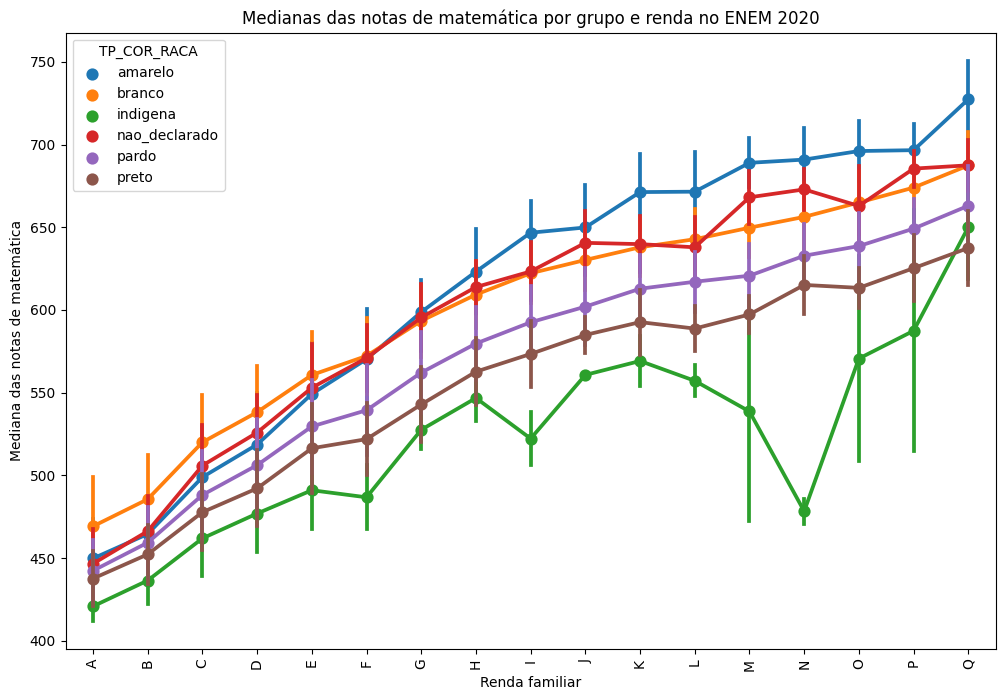

In [ ]:
import matplotlib.pyplot as plt

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de pontos com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Rotaciona os rótulos do eixo x em 90 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


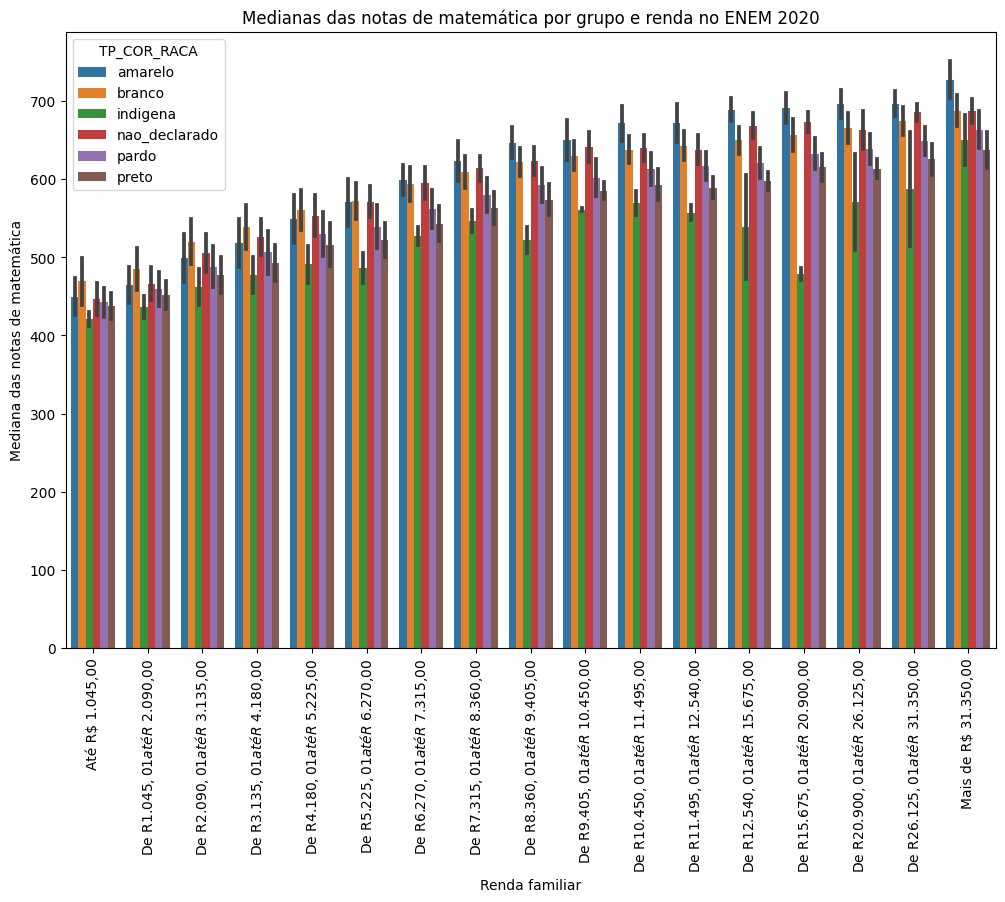

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Lista com as faixas de renda
faixas_renda = ['Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

plt.show()

plt.savefig('grafico.png', dpi=300, bbox_inches='tight')



In [ ]:
import matplotlib.pyplot as plt

# Lista com as faixas de renda
faixas_renda = ['Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2018.groupby(['TP_COR_RACA', 'Q004', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q004', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

plt.show()

plt.savefig('grafico.png', dpi=300, bbox_inches='tight')



In [ ]:
import numpy as np

# Adiciona o elemento vazio à lista de faixas de renda
faixas_renda = ['', 'Nenhuma Renda','Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Adiciona o grupo "Nenhuma Renda" ao conjunto de dados
nula = np.zeros((mediana_notas_mat.shape[0], 1))
nula[:,0] = ' '
mediana_notas_mat.insert(1, 'Nenhuma Renda', nula.flatten())

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

# Salva a figura em PNG
plt.savefig('grafico.jpeg', dpi=300, bbox_inches='tight')

plt.show()


ValueError: ignored

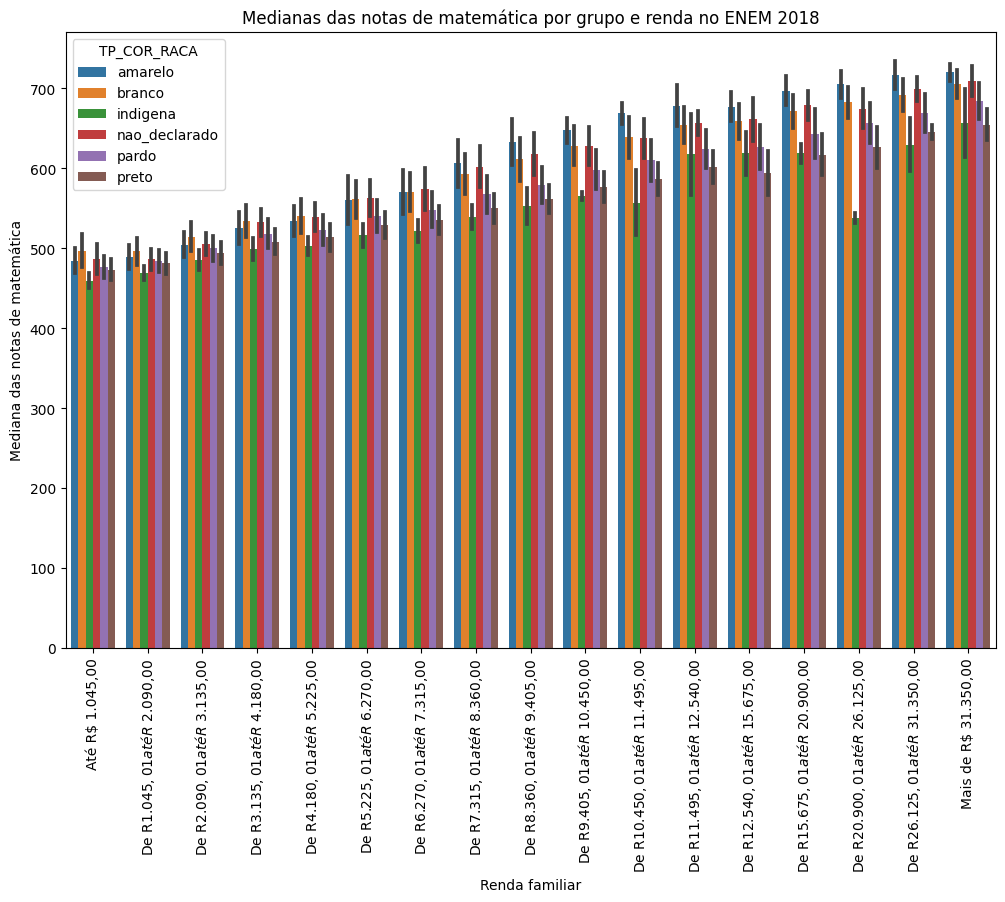

In [ ]:

# Lista com as faixas de renda
faixas_renda1 = ['Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2018.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2018')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

# Salva a figura em PNG
plt.savefig('grafico.jpeg', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2011.groupby(['TP_COR_RACA', 'Renda real', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Renda real', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2018')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(tabela_faixas_renda['Faixas de renda'], rotation=90)

# Salva a figura em PNG
plt.savefig('grafico.jpeg', dpi=300, bbox_inches='tight')

plt.show()


KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Lista com as faixas de renda
faixas_renda = ['Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2018.groupby(['TP_COR_RACA', 'Q005', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q005', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2011')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

# Salva a figura em PNG
plt.savefig('grafico.jpeg', dpi=300, bbox_inches='tight')

plt.show()


KeyError: ignored

ValueError: ignored

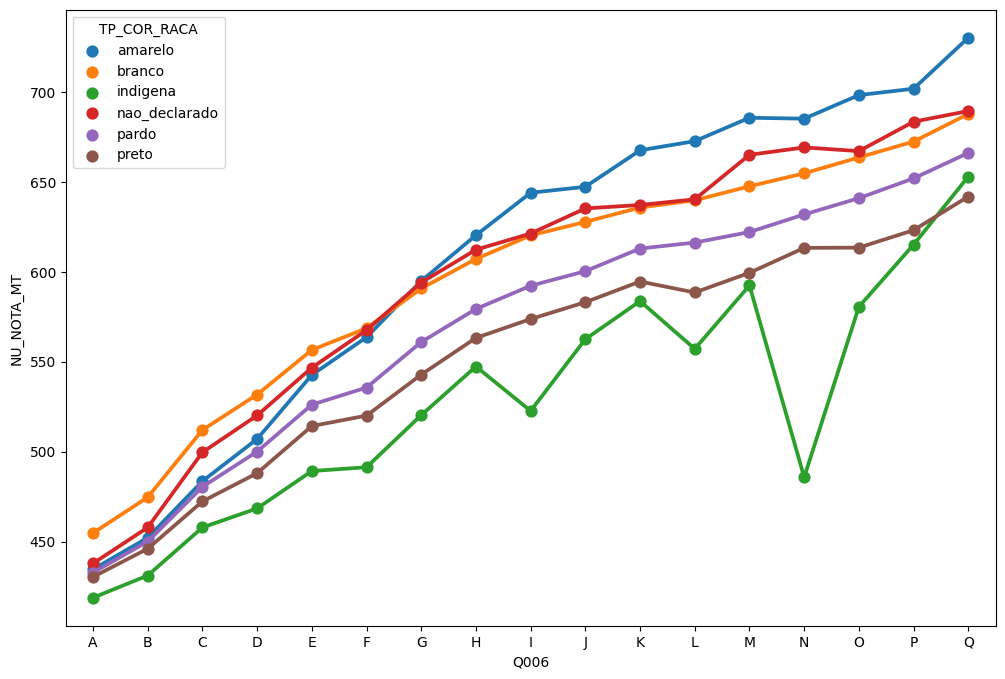

In [ ]:
import matplotlib.pyplot as plt

# Calcula as medianas das notas de matemática para cada grupo e renda
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'Q006'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de pontos com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

# Define os valores reais das faixas de renda
renda_labels = ['Até R$ 1.100,00', 'De R$ 1.100,01 a R$ 2.200,00', 'De R$ 2.200,01 a R$ 3.300,00',
                'De R$ 3.300,01 a R$ 4.400,00', 'De R$ 4.400,01 a R$ 5.500,00', 'De R$ 5.500,01 a R$ 6.600,00',
                'De R$ 6.600,01 a R$ 7.700,00', 'De R$ 7.700,01 a R$ 8.800,00', 'De R$ 8.800,01 a R$ 9.900,00',
                'De R$ 9.900,01 a R$ 11.000,00', 'De R$ 11.000,01 a R$ 13.200,00', 'De R$ 13.200,01 a R$ 15.400,00',
                'De R$ 15.400,01 a R$ 17.600,00', 'De R$ 17.600,01 a R$ 19.800,00', 'De R$ 19.800,01 a R$ 22.000,00',
                'Acima de R$ 22.000,00']

# Define as legendas do eixo x como as faixas de renda em valores reais
ax.set_xticklabels(renda_labels, rotation=90)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')
plt.show()


In [ ]:
# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')
ax.set_xticklabels(['Até R$ 998', 'De R$ 998 até R$ 1.497', 'De R$ 1.497 até R$ 1.996', 'De R$ 1.996 até R$ 2.495', 'De R$ 2.495 até R$ 2.994', 'De R$ 2.994 até R$ 3.992', 'De R$ 3.992 até R$ 4.990', 'De R$ 4.990 até R$ 5.988', 'De R$ 5.988 até R$ 6.986', 'De R$ 6.986 até R$ 7.984', 'De R$ 7.984 até R$ 8.982', 'De R$ 8.982 até R$ 9.980', 'De R$ 9.980 até R$ 11.976', 'De R$ 11.976 até R$ 14.970', 'De R$ 14.970 até R$ 19.960', 'De R$ 19.960 até R$ 24.950', 'Acima de R$ 24.950'])
plt.show()

NameError: ignored

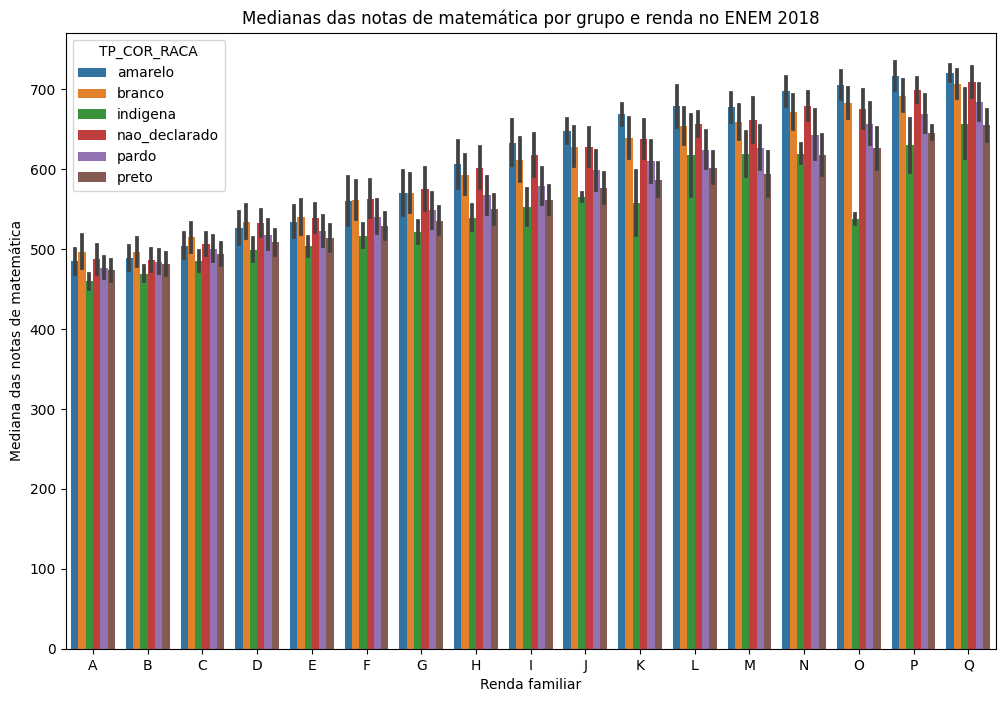

In [ ]:
# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2018.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2018')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')
plt.show()


In [ ]:
# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2011.groupby(['TP_COR_RACA', 'Q004', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q004', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2011')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')
plt.show()



KeyError: ignored

In [ ]:
import numpy as np

# Adiciona o elemento vazio à lista de faixas de renda
faixas_renda = ['', 'Nenhuma Renda','Até R$ 1.045,00', 'De R$ 1.045,01 até R$ 2.090,00', 'De R$ 2.090,01 até R$ 3.135,00',
                'De R$ 3.135,01 até R$ 4.180,00', 'De R$ 4.180,01 até R$ 5.225,00', 'De R$ 5.225,01 até R$ 6.270,00',
                'De R$ 6.270,01 até R$ 7.315,00', 'De R$ 7.315,01 até R$ 8.360,00', 'De R$ 8.360,01 até R$ 9.405,00',
                'De R$ 9.405,01 até R$ 10.450,00', 'De R$ 10.450,01 até R$ 11.495,00', 'De R$ 11.495,01 até R$ 12.540,00',
                'De R$ 12.540,01 até R$ 15.675,00', 'De R$ 15.675,01 até R$ 20.900,00', 'De R$ 20.900,01 até R$ 26.125,00',
                'De R$ 26.125,01 até R$ 31.350,00', 'Mais de R$ 31.350,00']

# Calcula as medianas das notas de matemática para cada grupo e sexo
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'Q006', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Adiciona o grupo "Nenhuma Renda" ao conjunto de dados
nula = np.zeros((mediana_notas_mat.shape[0], 1))
nula[:,0] = ' '
mediana_notas_mat.insert(1, 'Nenhuma Renda', nula.flatten())

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2020')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')

# Altera as legendas do eixo x
ax.set_xticklabels(faixas_renda, rotation=90)

# Salva a figura em PNG
plt.savefig('grafico.jpeg', dpi=300, bbox_inches='tight')

plt.show()


ValueError: ignored

ValueError: ignored

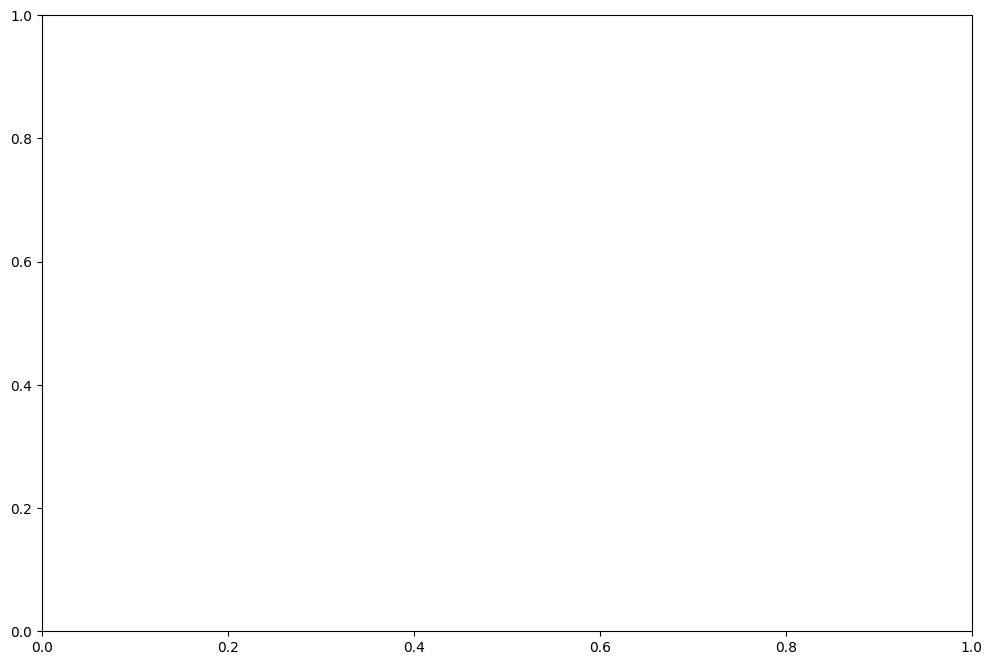

In [ ]:

mediana_notas_mat = educacao_2018.groupby(['TP_COR_RACA', 'Q005', 'TP_SEXO_M', 'TP_SEXO_F'])['NU_NOTA_MT'].median().reset_index()

# Define as faixas de renda
faixas_renda = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Define os rótulos correspondentes às faixas de renda
rotulos_renda = ['Nenhuma renda',
                 'Até um salário mínimo (até R$545,00)',
                 'Entre 1 e 1,5 salários (entre R$545,00 até R$817,50)',
                 'Entre 1,5 e 2 salários (entre R$817,50 até R$1.090,00)',
                 'Entre 2 e 5 salários (entre R$1.090,00 até R$2.725,00)',
                 'Entre 5 e 7 salários (entre R$2.725,00 até R$3.815,00)',
                 'Entre 7 e 10 salários (entre R$3.815,00 até R$5.450,00)',
                 'Entre 10 e 12 salários (entre R$5.450,00 até R$6.540,00)',
                 'Entre 12 e 15 salários (entre R$6.540,00 até R$8.175,00)',
                 'Entre 15 e 30 salários (entre R$8.175,00 até R$16.350,00)']

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Q004', y='NU_NOTA_MT', hue='TP_COR_RACA', data=mediana_notas_mat, ax=ax)

# Define as faixas de renda e os rótulos correspondentes na legenda do eixo x
ax.set_xticklabels(rotulos_renda)

ax.set_title('Medianas das notas de matemática por grupo e renda no ENEM 2011')
ax.set_xlabel('Renda familiar')
ax.set_ylabel('Mediana das notas de matemática')
plt.show()


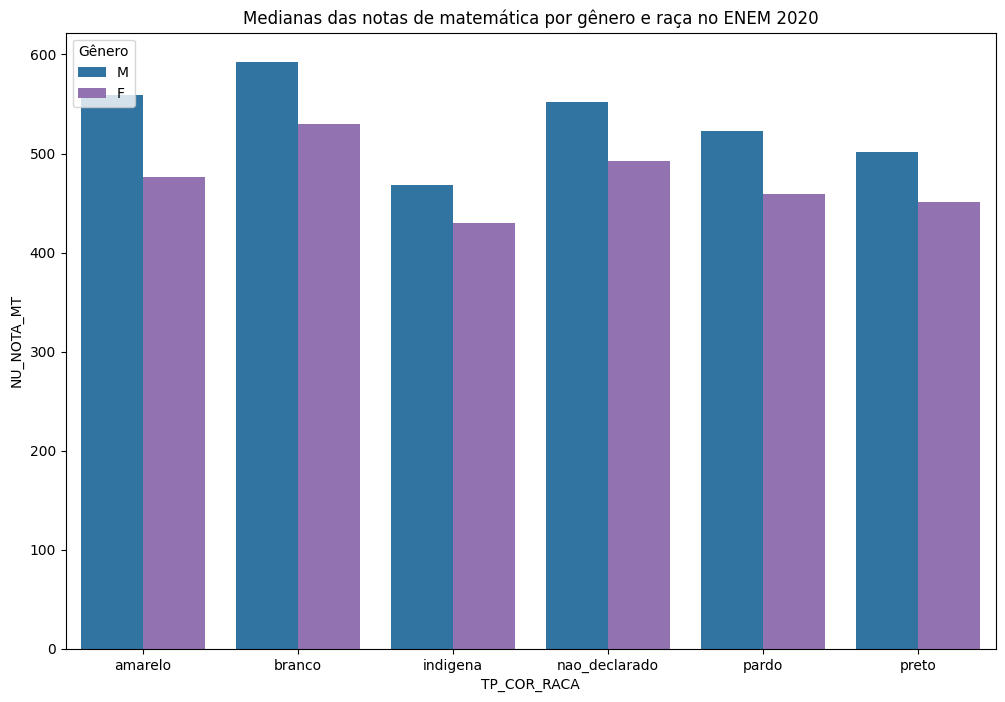

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define as cores das barras para homens e mulheres
colors = {'M': 'tab:blue', 'F': 'tab:purple'}

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2020.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Mapeia os valores numéricos da coluna 'TP_SEXO_F' para 'M' e 'F'
mediana_notas_mat['TP_SEXO_F'] = mediana_notas_mat['TP_SEXO_F'].map({0: 'M', 1: 'F'})

# Plota o gráfico de barras com as medianas das notas de matemática e as cores corretas
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax,
            palette=colors)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2020')

# Define os rótulos das legendas como 'M' e 'F'
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], title='Gênero', loc='upper left')

plt.show()

plt.savefig('grafico4.jpeg', dpi=300, bbox_inches='tight')


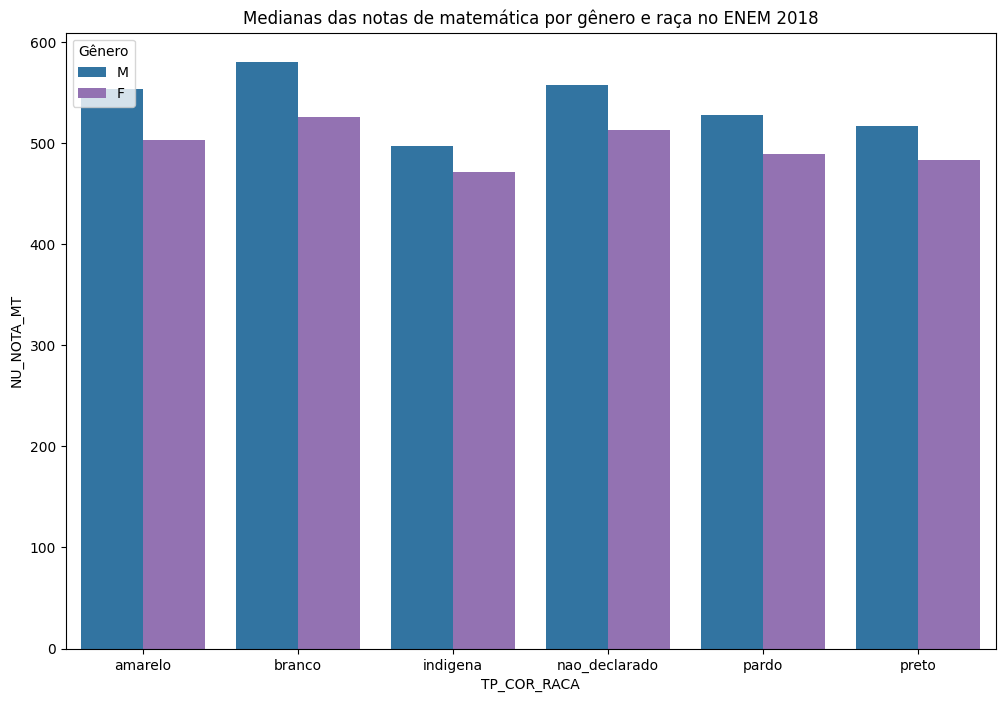

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define as cores das barras para homens e mulheres
colors = {'M': 'tab:blue', 'F': 'tab:purple'}

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2018.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Mapeia os valores numéricos da coluna 'TP_SEXO_F' para 'M' e 'F'
mediana_notas_mat['TP_SEXO_F'] = mediana_notas_mat['TP_SEXO_F'].map({0: 'M', 1: 'F'})

# Plota o gráfico de barras com as medianas das notas de matemática e as cores corretas
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax,
            palette=colors)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2018')

# Define os rótulos das legendas como 'M' e 'F'
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], title='Gênero', loc='upper left')

plt.show()

plt.savefig('grafico4.jpeg', dpi=300, bbox_inches='tight')


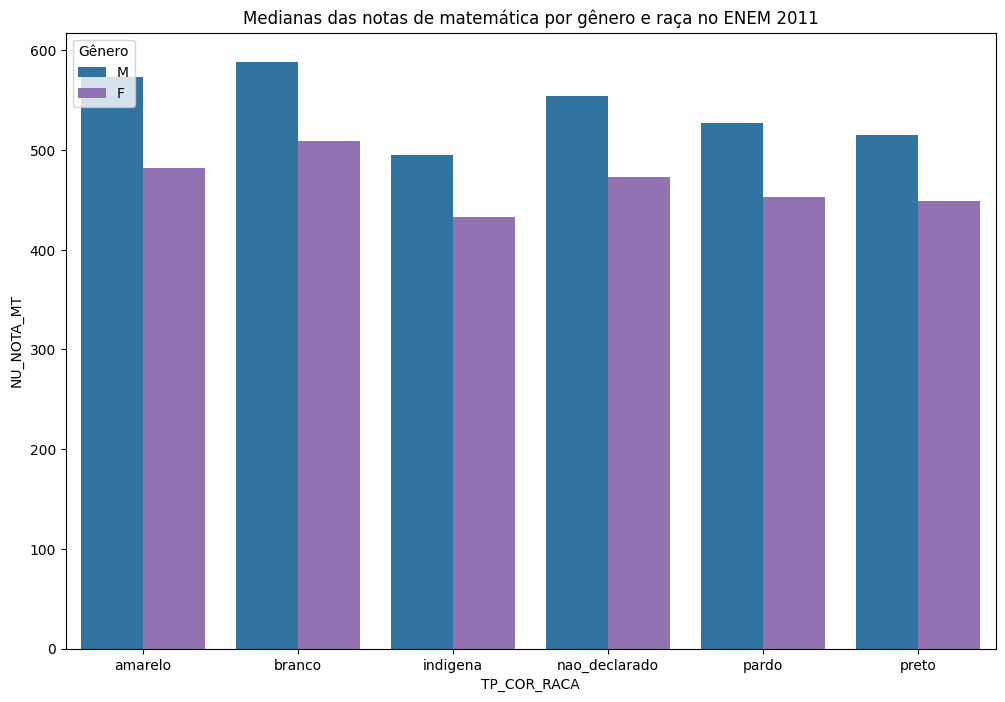

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define as cores das barras para homens e mulheres
colors = {'M': 'tab:blue', 'F': 'tab:purple'}

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2011.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Mapeia os valores numéricos da coluna 'TP_SEXO_F' para 'M' e 'F'
mediana_notas_mat['TP_SEXO_F'] = mediana_notas_mat['TP_SEXO_F'].map({0: 'M', 1: 'F'})

# Plota o gráfico de barras com as medianas das notas de matemática e as cores corretas
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax,
            palette=colors)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2011')

# Define os rótulos das legendas como 'M' e 'F'
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['M', 'F'], title='Gênero', loc='upper left')

plt.show()

plt.savefig('grafico4.jpeg', dpi=300, bbox_inches='tight')


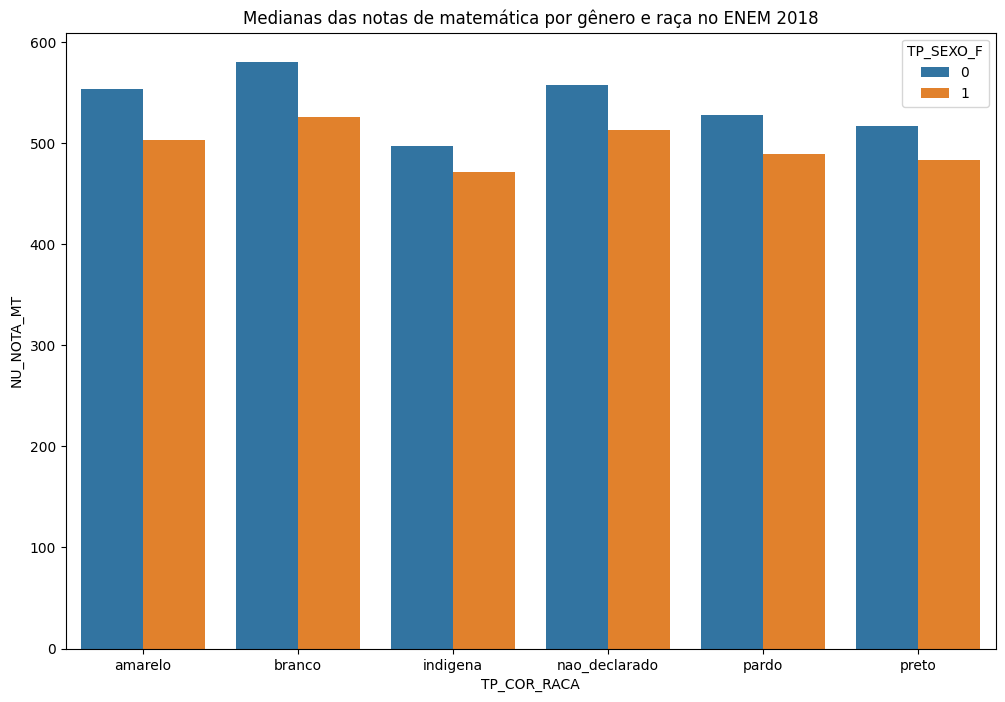

In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2018.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2018')
plt.show()

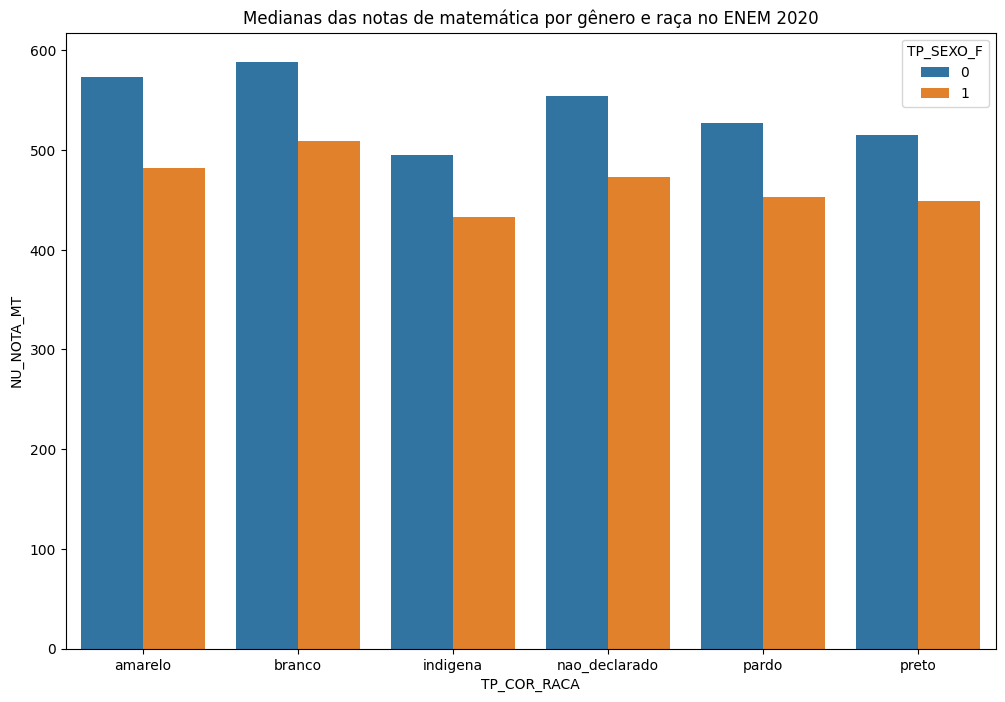

In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2011.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2020')
plt.show()

In [ ]:
mediana_notas_mat = mediana_notas_mat.rename(columns={'TP_SEXO_F': 'F', 'TP_SEXO_M': 'M'})


In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2018.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F','TP_SEXO_F', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2018')

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


SyntaxError: ignored

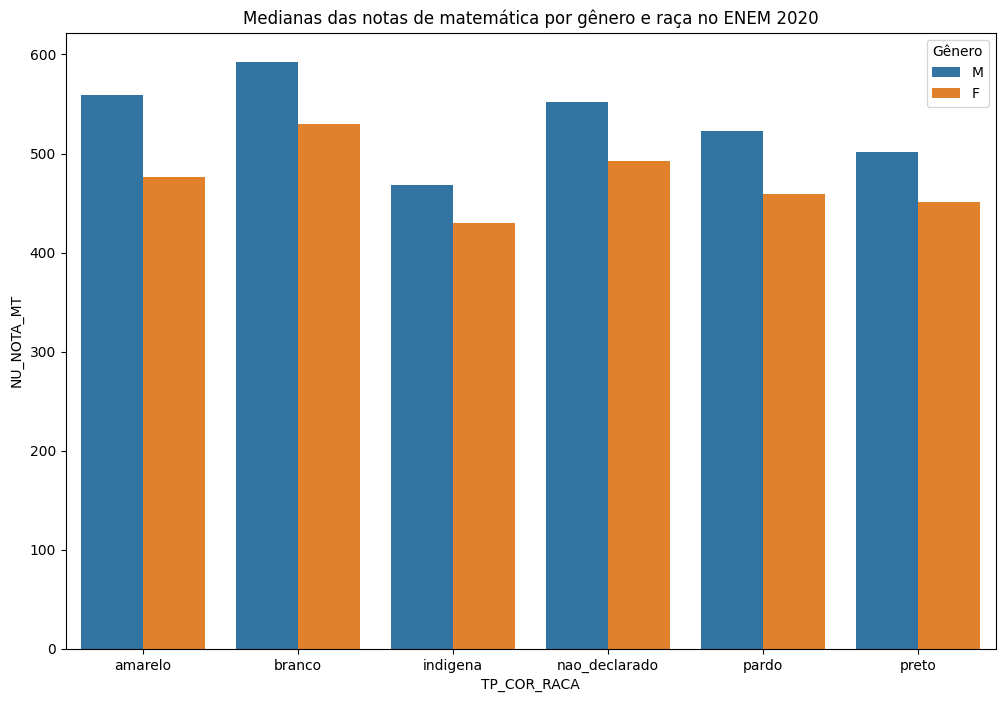

In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2020.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2020')

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


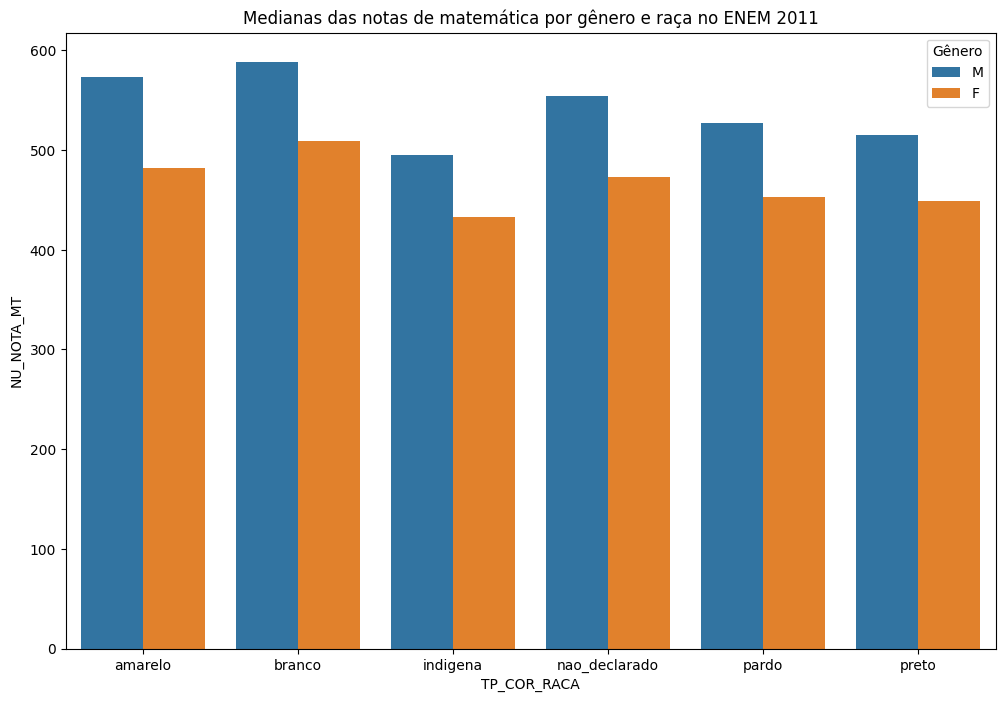

In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2011.groupby(['TP_SEXO_F', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO_F', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2011')

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


In [ ]:
# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()

In [ ]:
# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO_F", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="", loc="upper right")
# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')
plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')

plt.show()


NameError: ignored

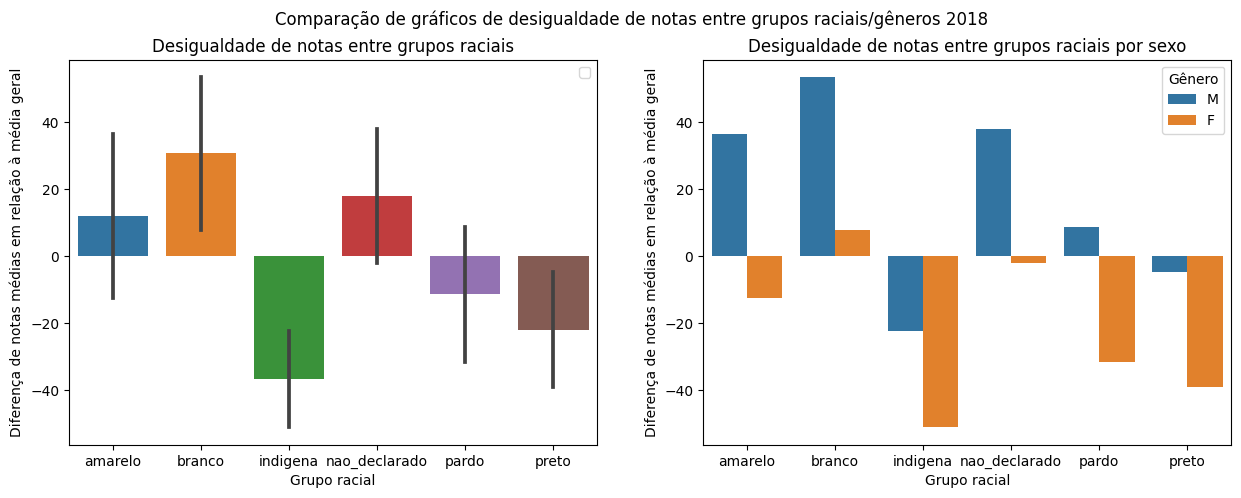

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a nota média geral
mean_score = educacao_2018['NU_NOTA_MT'].mean()

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2018.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean().reset_index()

# Calcular a diferença de notas médias em relação à média geral
score_mean['diff'] = score_mean['NU_NOTA_MT'] - mean_score

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", data=score_mean, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", hue="TP_SEXO_F", data=score_mean, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2018")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação à média geral")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title='Gênero', loc='upper right')

plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')
plt.show()


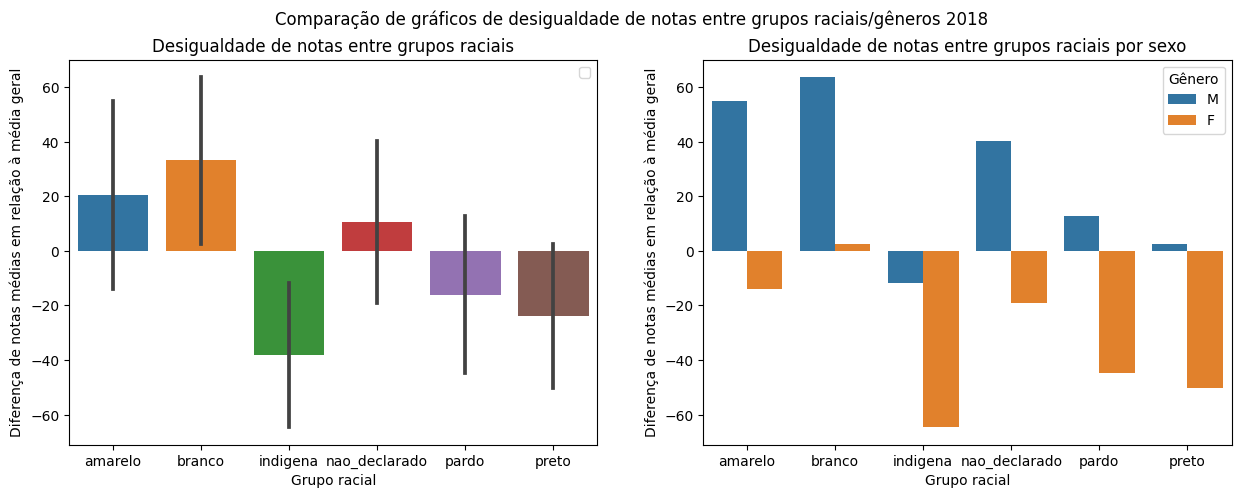

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a nota média geral
mean_score = educacao_2011['NU_NOTA_MT'].mean()

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean().reset_index()

# Calcular a diferença de notas médias em relação à média geral
score_mean['diff'] = score_mean['NU_NOTA_MT'] - mean_score

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", data=score_mean, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="diff", hue="TP_SEXO_F", data=score_mean, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2018")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação à média geral")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend(handles, labels, title='Gênero', loc='upper right')

plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')
plt.show()


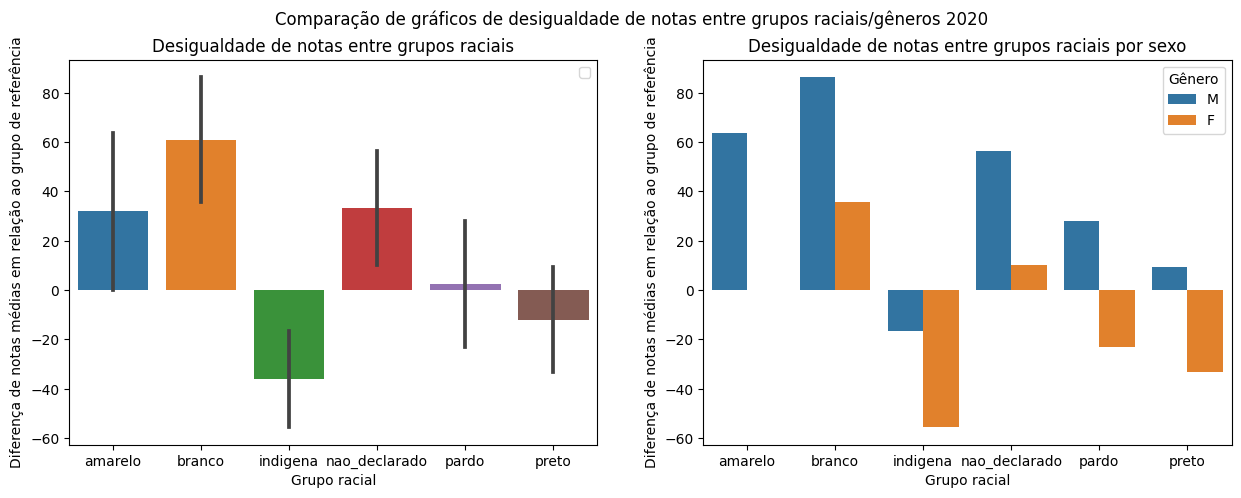

In [ ]:

import matplotlib.pyplot as plt

# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2020.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO_F", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2020")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="", loc="upper right")
# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')
plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')

plt.show()


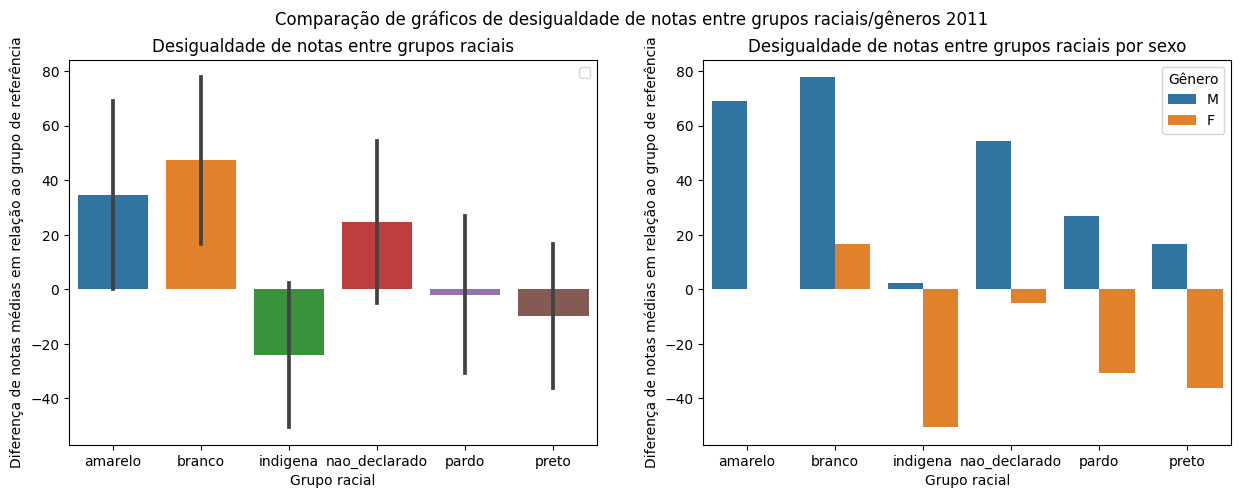

In [ ]:
# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO_F'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO_F", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros 2011")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="", loc="upper right")
# Adiciona legenda customizada para TP_SEXO_F
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')
plt.savefig('grafico7.jpeg', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2020.groupby(['TP_COR_RACA', 'TP_SEXO'])['NU_NOTA_MT'].median().reset_index()

# Adiciona uma nova coluna para indicar o gênero
mediana_notas_mat['TP_SEXO'] = mediana_notas_mat['TP_SEXO'].apply(lambda x: 'F' if x == 'F' else 'M')

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2020')

# Adiciona legenda customizada para TP_SEXO
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


KeyError: ignored